# AdaBoost (Adaptive Boosting):
- AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak learners
- (e.g., decision trees with limited depth) to create a strong classifier.
- It assigns weights to data points, focuses on misclassified samples, and iteratively builds weak models to correct errors.
- The final prediction is a weighted combination of weak learners outputs, and it is highly effective in improving classification accuracy.


The code below is implementing a boosting algorithm i.e AdaBoost (Adaptive Boosting), in a step-by-step manner for a binary classification problem.
Here are the main steps and points of what is being done:

1. **Data Preparation**:
   - A  dataset is created with two features (X1 and X2) and a binary label (0 or 1).
   - The dataset is visualized using a scatter plot to observe the distribution of data points.

2. **Assigning Weights**:
   - Initial weights are assigned to each data point. In this case, all weights are set to 0.1, as there are ten data points in total.

3. **Base Model (Weak Learner)**:
   - A decision tree classifier with a maximum depth of 1 (a stump) is trained on the dataset. This is considered a weak learner.
   - The decision tree's structure is visualized using the `plot_tree` function.

4. **Weighted Prediction**:
   - The weak learner predicts labels for the data points, and these predictions are stored in the 'y_pred' column of the DataFrame.

5. **Calculating Model Weight (Alpha)**:
   - A function is defined to calculate the weight (alpha) of the current weak learner based on its error rate.
   - The calculated alpha value represents the contribution of the weak learner to the final ensemble model.

6. **Updating Data Point Weights**:
   - The weights of the data points are updated based on whether the weak learner's predictions match the true labels. Data points with correct predictions have their weights reduced, while those with incorrect predictions have their weights increased.

7. **Normalizing Weights**:
   - The updated data point weights are normalized to ensure they sum up to 1, which is a requirement for AdaBoost.

8. **Creating a New Dataset**:
   - A new dataset is sampled by randomly selecting data points from the original dataset, with probabilities proportional to their normalized weights. This process is known as up-sampling, and it gives more importance to the misclassified points.

9. **Iterative Model Building**:
   - The steps from 3 to 8 are repeated for a specified number of iterations or until a certain condition is met. Each iteration involves training a new weak learner, calculating its weight, updating data point weights, and normalizing weights.

10. **Ensemble Model Prediction**:
    - To make predictions using the ensemble model, each weak learner's output (1 or -1) is scaled by its alpha value, and the results are summed to produce a final prediction.
    - If the sum is positive, the ensemble predicts class 1; if it's negative, the ensemble predicts class 0.

11. **Testing New Data Points**:
    - The code demonstrates how to use the trained ensemble model to make predictions on new data points.

In summary, this code is implementing the AdaBoost algorithm from scratch, which is an ensemble learning technique that combines the predictions of multiple weak learners (in this case, decision trees with depth 1) to create a strong classifier. It iteratively adjusts the weights of data points to focus on the misclassified samples, and the final prediction is a weighted combination of the weak learners predictions. This process continues for several iterations to improve classification accuracy.

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,3,3,4,5,6,7,7,8,9]
df['X2'] = [10,6,5,6,1,2,8,9,2,5]
df['label'] = [0,1,1,1,0,0,1,1,0,0]

In [4]:
df

,X1,X2,label
0,1,10,0
1,3,6,1
2,3,5,1
3,4,6,1
4,5,1,0
5,6,2,0
6,7,8,1
7,7,9,1
8,8,2,0
9,9,5,0


<Axes: xlabel='X1', ylabel='X2'>

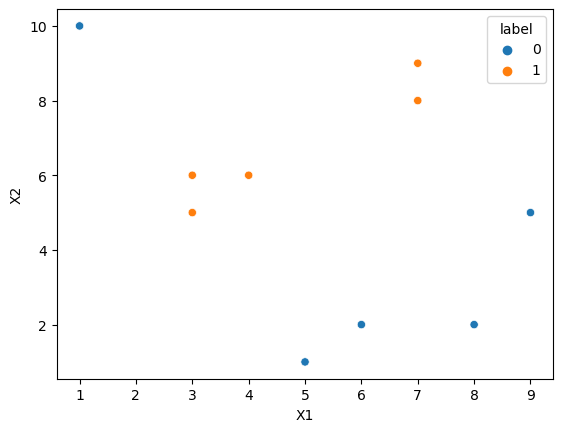

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [6]:
#Step -1 : Assigining weights
df['weight'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weight
0,1,10,0,0.1
1,3,6,1,0.1
2,3,5,1,0.1
3,4,6,1,0.1
4,5,1,0,0.1
5,6,2,0,0.1
6,7,8,1,0.1
7,7,9,1,0.1
8,8,2,0,0.1
9,9,5,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth = 1)

In [10]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,2].values

In [11]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 3.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]')]

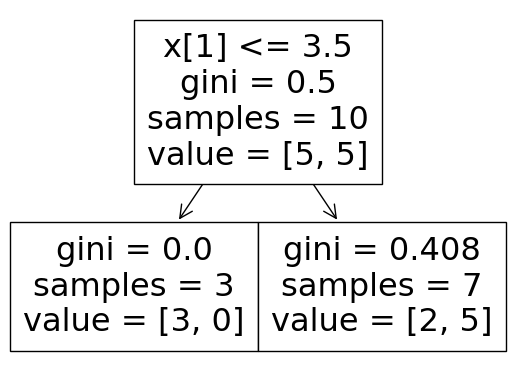

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

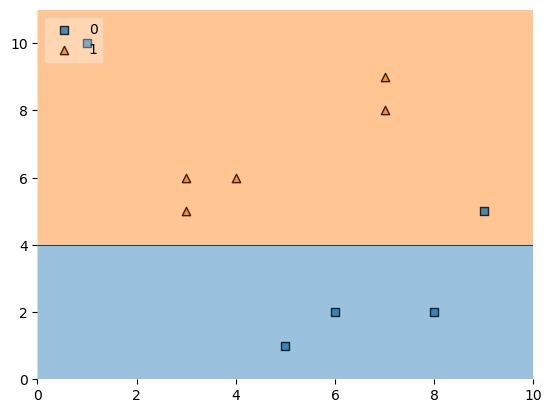

In [13]:
plot_decision_regions(X, y, clf = dt1, legend = 2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weight,y_pred
0,1,10,0,0.1,1
1,3,6,1,0.1,1
2,3,5,1,0.1,1
3,4,6,1,0.1,1
4,5,1,0,0.1,0
5,6,2,0,0.1,0
6,7,8,1,0.1,1
7,7,9,1,0.1,1
8,8,2,0,0.1,0
9,9,5,0,0.1,1


In [16]:
# 3 mistakes i.e. 3/10 = 0.3

In [17]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [18]:
#Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [19]:
#Step 4 - Update weights
def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [20]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)

In [21]:
df

,X1,X2,label,weight,y_pred,updated_weights
0,1,10,0,0.1,1,0.152653
1,3,6,1,0.1,1,0.065508
2,3,5,1,0.1,1,0.065508
3,4,6,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,2,0,0.1,0,0.065508
6,7,8,1,0.1,1,0.065508
7,7,9,1,0.1,1,0.065508
8,8,2,0,0.1,0,0.065508
9,9,5,0,0.1,1,0.152653


In [22]:
df['updated_weights'].sum()

0.8293697656827363

In [23]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [24]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights
0,1,10,0,0.1,1,0.152653,0.184060
1,3,6,1,0.1,1,0.065508,0.078985
2,3,5,1,0.1,1,0.065508,0.078985
3,4,6,1,0.1,1,0.065508,0.078985
4,5,1,0,0.1,0,0.065508,0.078985
5,6,2,0,0.1,0,0.065508,0.078985
6,7,8,1,0.1,1,0.065508,0.078985
7,7,9,1,0.1,1,0.065508,0.078985
8,8,2,0,0.1,0,0.065508,0.078985
9,9,5,0,0.1,1,0.152653,0.184060


In [25]:
df['normalized_weights'].sum()

1.0

In [26]:
# Calculating range of values

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [28]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [29]:
df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,10,0,0.1,1,0.152653,0.184060,0.184060,0.000000
1,3,6,1,0.1,1,0.065508,0.078985,0.263045,0.184060
2,3,5,1,0.1,1,0.065508,0.078985,0.342030,0.263045
3,4,6,1,0.1,1,0.065508,0.078985,0.421015,0.342030
4,5,1,0,0.1,0,0.065508,0.078985,0.500000,0.421015
5,6,2,0,0.1,0,0.065508,0.078985,0.578985,0.500000
6,7,8,1,0.1,1,0.065508,0.078985,0.657970,0.578985
7,7,9,1,0.1,1,0.065508,0.078985,0.736955,0.657970
8,8,2,0,0.1,0,0.065508,0.078985,0.815940,0.736955
9,9,5,0,0.1,1,0.152653,0.184060,1.000000,0.815940


In [30]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices
    

In [31]:
index_values = create_new_dataset(df)
index_values

[5, 7, 9, 5, 0, 6, 8, 5, 0, 5]

In [32]:
# weight of those rows have increased where errors occurred. this is called up sampling

In [33]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [34]:
second_df

,X1,X2,label,weight
5,6,2,0,0.1
7,7,9,1,0.1
9,9,5,0,0.1
5,6,2,0,0.1
0,1,10,0,0.1
6,7,8,1,0.1
8,8,2,0,0.1
5,6,2,0,0.1
0,1,10,0,0.1
5,6,2,0,0.1


In [35]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [36]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:,2].values

In [37]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 6.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]')]

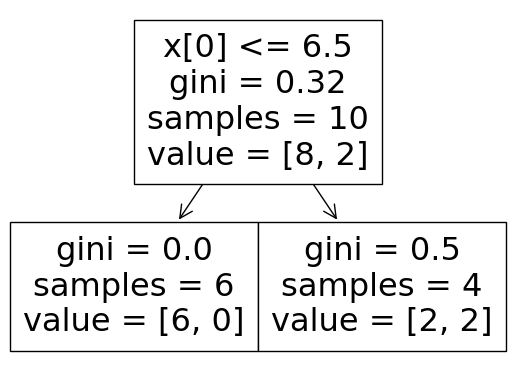

In [38]:
plot_tree(dt2)

<Axes: >

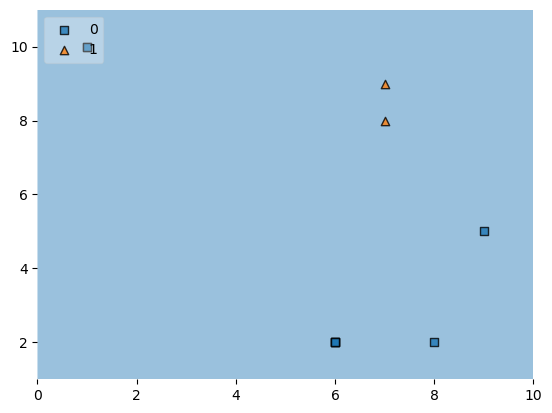

In [39]:
plot_decision_regions(X, y , clf = dt2, legend =2)

In [40]:
# One mistake

In [41]:
second_df['y_pred'] = dt2.predict(X)

In [42]:
second_df

,X1,X2,label,weight,y_pred
5,6,2,0,0.1,0
7,7,9,1,0.1,0
9,9,5,0,0.1,0
5,6,2,0,0.1,0
0,1,10,0,0.1,0
6,7,8,1,0.1,0
8,8,2,0,0.1,0
5,6,2,0,0.1,0
0,1,10,0,0.1,0
5,6,2,0,0.1,0


In [43]:
alpha2 = calculate_model_weight(0.1)

In [44]:
alpha2

1.0986122886681098

In [45]:
# Update weights
def update_row_weights(row, alpha = 1.09):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [46]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis = 1)

In [47]:
second_df

,X1,X2,label,weight,y_pred,updated_weights
5,6,2,0,0.1,0,0.033622
7,7,9,1,0.1,0,0.297427
9,9,5,0,0.1,0,0.033622
5,6,2,0,0.1,0,0.033622
0,1,10,0,0.1,0,0.033622
6,7,8,1,0.1,0,0.297427
8,8,2,0,0.1,0,0.033622
5,6,2,0,0.1,0,0.033622
0,1,10,0,0.1,0,0.033622
5,6,2,0,0.1,0,0.033622


In [48]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [49]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights
5,6,2,0,0.1,0,0.033622,0.038922
7,7,9,1,0.1,0,0.297427,0.344313
9,9,5,0,0.1,0,0.033622,0.038922
5,6,2,0,0.1,0,0.033622,0.038922
0,1,10,0,0.1,0,0.033622,0.038922
6,7,8,1,0.1,0,0.297427,0.344313
8,8,2,0,0.1,0,0.033622,0.038922
5,6,2,0,0.1,0,0.033622,0.038922
0,1,10,0,0.1,0,0.033622,0.038922
5,6,2,0,0.1,0,0.033622,0.038922


In [50]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])


In [51]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']


In [52]:
second_df[['X1','X2','label', 'weight','y_pred','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
5,6,2,0,0.1,0,0.033622,0.038922,0.000000,0.038922
7,7,9,1,0.1,0,0.297427,0.344313,0.038922,0.383235
9,9,5,0,0.1,0,0.033622,0.038922,0.383235,0.422157
5,6,2,0,0.1,0,0.033622,0.038922,0.422157,0.461078
0,1,10,0,0.1,0,0.033622,0.038922,0.461078,0.500000
6,7,8,1,0.1,0,0.297427,0.344313,0.500000,0.844313
8,8,2,0,0.1,0,0.033622,0.038922,0.844313,0.883235
5,6,2,0,0.1,0,0.033622,0.038922,0.883235,0.922157
0,1,10,0,0.1,0,0.033622,0.038922,0.922157,0.961078
5,6,2,0,0.1,0,0.033622,0.038922,0.961078,1.000000


In [53]:
index_values = create_new_dataset(second_df)

In [54]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [55]:
third_df

,X1,X2,label,weight
8,8,2,0,0.1
5,6,2,0,0.1
5,6,2,0,0.1
8,8,2,0,0.1
5,6,2,0,0.1
5,6,2,0,0.1
6,7,8,1,0.1
5,6,2,0,0.1
6,7,8,1,0.1
8,8,2,0,0.1


In [56]:
dt3 = DecisionTreeClassifier(max_depth = 1)

In [57]:
X = third_df.iloc[:, 0:2].values
y = third_df.iloc[:,2].values

In [58]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 5.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

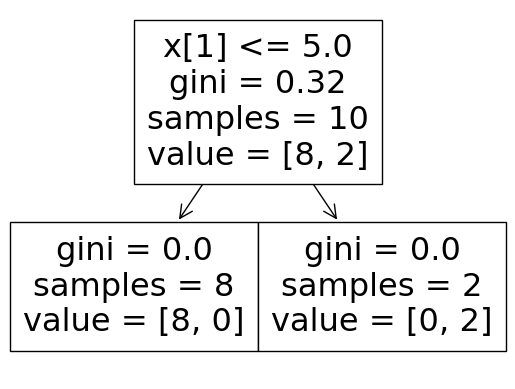

In [59]:
plot_tree(dt3)

<Axes: >

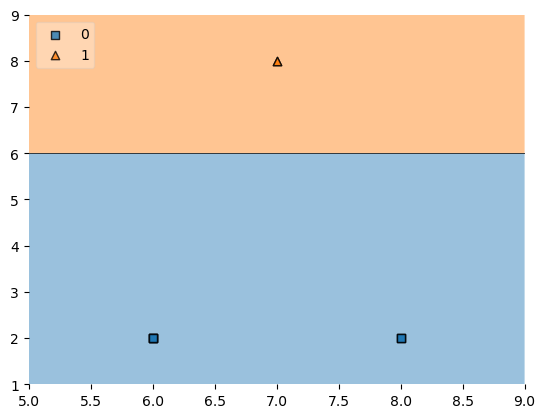

In [60]:
plot_decision_regions(X, y , clf = dt3, legend =2)

In [61]:
third_df['y_pred'] = dt3.predict(X)

In [62]:
third_df

,X1,X2,label,weight,y_pred
8,8,2,0,0.1,0
5,6,2,0,0.1,0
5,6,2,0,0.1,0
8,8,2,0,0.1,0
5,6,2,0,0.1,0
5,6,2,0,0.1,0
6,7,8,1,0.1,1
5,6,2,0,0.1,0
6,7,8,1,0.1,1
8,8,2,0,0.1,0


In [63]:
#here error is 0. to avoid infinity case
error = 0.0000001
alpha3 = calculate_model_weight(error)

In [64]:
alpha3

8.059047775479158

In [65]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 8.059047775479158


**Predictionn**

In [66]:
query = np.array([3,6]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [67]:
dt2.predict(query)

array([0], dtype=int64)

In [68]:
dt3.predict(query)

array([1], dtype=int64)

In [69]:
# -1 for 0 and 1 for 1
alpha1*1 + alpha2*(-1) + alpha3*1

7.38408441700465

In [70]:
np.sign(7.38)

1.0

In [71]:
#Predicts 1

In [72]:
query = np.array([9,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [73]:
dt2.predict(query)

array([0], dtype=int64)

In [74]:
dt3.predict(query)

array([0], dtype=int64)

In [75]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

-8.734011133953667

In [76]:
np.sign(-8.73)

-1.0

In [77]:
#Predicts 0